In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from pyvis.network import Network
import pandas as pd
import os, sys

Here we will develop the `ElectricalGrid()` graph object and fully visualize it!
I'm envisioning
- different symbols for various types of nodes:
  - solar, wind, hydro, nuclear, battery storage, 
    consumer vs. corporation, distributed system
- color / bound microgrids together?
- add a map of the city to the background?
- color code the edges based on how much voltage?
- would be insane if we could visualize a live simulation of the grid, as it runs...

## Creating the Grid Thing
We will use `networkx` for the graph construction and running basic graph optimization algorithms. All networkx algorithms are listed [here](https://networkx.org/documentation/stable/reference/algorithms/index.html).

(1, 2)
(2, 3)
{'voltage': 10}
10
(1, 2) {'voltage': 10}
(2, 3) {'voltage': 20}
(1, 2, 10)
(2, 3, 20)


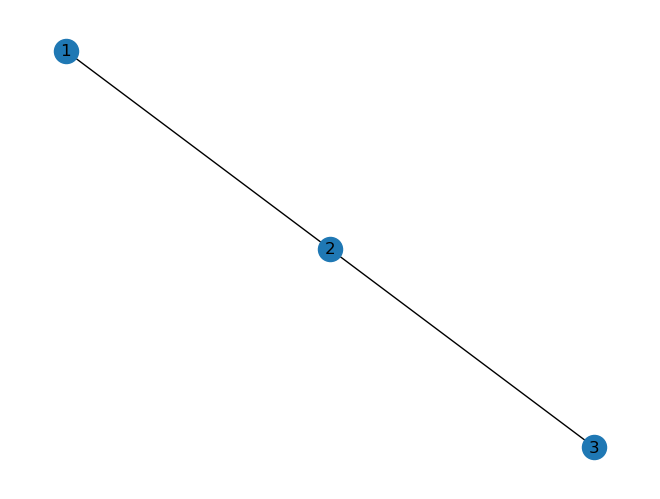

In [18]:

G = nx.Graph()

class Node:
    # a node representing an electrical grid component
    # and a vertex on the graph
    def __init__(self, id, type):
        self.id = id
        # consumer, producer, etc.?
        self.type = type
        # voltage?
        self.voltage = 0.0

    def __str__(self) -> str:
        return f"Node {self.id} of type {self.type}"
    
    def __hash__(self) -> int:
        return self.id

nodes = [(1, {'type': 'solar'}), (2, {'type': 'wind'}), (3, {'type': 'hydro'})]
edges = [(1, 2, {'voltage': 10}), (2, 3, {'voltage': 20})]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# iterating through existing nx graph
# EDGES
for e in list(G.edges):
    print(e)
    pass
edge = G.edges[1,2]  # is of type datadict
print(edge)
print(edge['voltage'])
for e, datadict in G.edges.items():
    # can also use G.edges.values() to get just datadicts
    print(e, datadict)
    pass
for datadict in G.edges.values():
    pass
# specific attribute iteration
for voltage in G.edges.data('voltage'):
    print(voltage)
    pass


nx.draw(G, with_labels=True)
plt.show()

## Visualizing the Grid
We will use `pyvis` for graph creation. We will need to pass some additional data to make a custom (basic) visualizer here. I'm following the basic [PyVis tutorial](https://pyvis.readthedocs.io/en/latest/tutorial.html).

For some reason I can't get Jupyter to render the html in-line... is there another module needed to install?

As a work-around, I downloaded Live Server for VSCode and you can pop open the html on your browser straight from VSCode.

In [ ]:
nt = Network(notebook=True, cdn_resources='in_line')
nt.from_nx(G)
nt.show('nx.html')
# save local PyVis visualizations to htmls directory

In [ ]:
# create graph object
net = Network(
    notebook=True,  # for running in Jupyter, makes an IFrame
    #while using notebook in chrome browser, to render the graph, pass additional kwarg ‘cdn_resources’ as ‘remote’ or ‘inline’
    cdn_resources='in_line',  # use remote resources
    select_menu=True,  # allows seletion of menu items
    filter_menu=True,  # allows filtering of menu items
    neighborhood_highlight=True,  # highlight neighborhood of selected node
    height='750px',  # set height of canvas
    width='100%',  # set width of canvas
    #bgcolor='#222222',  # set background color of canvas to dark grey
    #font_color='white',  # set font color of canvas
    heading='My Network',  # set title of canvas
    directed=False,  # set directed graph
    )  
# add nodes
net.add_nodes(
    # node ids
    [1, 2, 3, 4, 5],  
    # node values (store as vertices)
    value=[10, 20, 30, 40, 50],  
    x=[1,3,6,2,8],  # x-coordinates of nodes
    y=[0,3,1,0,2],  # y-coordinates of nodes
    # node labels on graph
    label=['Node #1', 'Node #2', 'Node #3', 'Node #4', 'Node #5'],
    # node titles (display on mouse hover)
    # can add html rendering
    title=['Main node', 'Just node', 'Just node', 'Just node', 'Node with self-loop'],
    color=['#d47415', '#22b512', '#42adf5', '#4a21b0', '#e627a3']  # node colors (HEX)
)
# add list of edges, same as in the previous example
net.add_edges([(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (5, 5)])

# toggle physics simulation when dragging vertices to reshape grid
net.toggle_physics(True) 
# show editable physics simulation options
net.show_buttons(filter_=['physics'])  # show only physics simulation
# copy paste the output from the buttons into this to finalize 
# physics options:
# net.set_options('{"physics": {"barnesHut": {"springLength": 100}}}')
setting_options = False
if setting_options:
    net.set_options("""

""")
net.show('graph.html')    # save visualization in 'graph.html'